# Erdos-Renyi Graphs

Code examples from [Think Complexity, 2nd edition](http://greenteapress.com/wp/complexity2), Chapter 2

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [1]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

import networkx as nx
import numpy as np

# colors from our friends at http://colorbrewer2.org
COLORS = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462',
          '#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']

In [2]:
from thinkstats2 import RandomSeed
RandomSeed(17)

## Directed graph

The first example is a directed graph that represents a social network with three nodes.

In [3]:
G = nx.DiGraph()
G.add_node('Alice')
G.add_node('Bob')
G.add_node('Chuck')
G.nodes()

['Bob', 'Alice', 'Chuck']

Here's how we add edges between nodes.

In [4]:
G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Chuck')
G.add_edge('Bob', 'Alice')
G.add_edge('Bob', 'Chuck')
G.edges()

[('Bob', 'Alice'), ('Bob', 'Chuck'), ('Alice', 'Bob'), ('Alice', 'Chuck')]

And here's how to draw the graph.

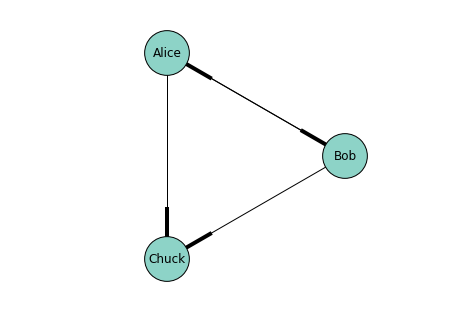

In [5]:
nx.draw_circular(G, 
                 node_color=COLORS[0], 
                 node_size=2000, 
                 with_labels=True)
plt.axis('equal')
plt.savefig('chap02-1.pdf')

**Exercise:**  Add another node and a few more edges and draw the graph again.

(-0.20000000000000001,
 1.2000000000000002,
 -0.20000000000000001,
 1.2000000000000002)

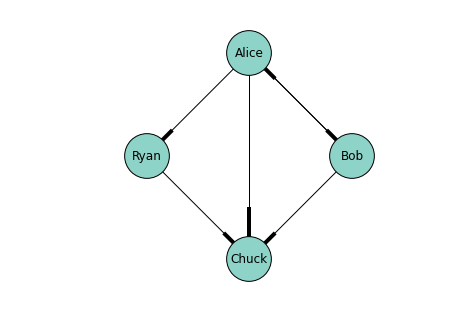

In [6]:
# Solution goes here
G.add_node('Ryan')
G.add_edge('Ryan', 'Chuck')
G.add_edge('Alice', 'Ryan')

nx.draw_circular(G, 
                 node_color=COLORS[0], 
                 node_size=2000, 
                 with_labels=True)
plt.axis('equal')

## Undirected graph

The second example is an undirected graph that represents cities and the driving times between them.

`pos` is a dictionary that maps from each city to its coordinates.

In [7]:
pos = dict(Albany=(-74, 43),
          Boston=(-71, 42),
          NYC=(-74, 41),
          Philly=(-75, 40))
pos['Albany']

(-74, 43)

We can use the keys in `pos` to add nodes to the graph.

In [8]:
G = nx.Graph()
G.add_nodes_from(pos)
G.nodes()

['NYC', 'Albany', 'Philly', 'Boston']

`drive_times` is a dictionary that maps from pairs of cities to the driving times between them.

In [9]:
drive_times = {('Albany', 'Boston'): 3,
               ('Albany', 'NYC'): 4,
               ('Boston', 'NYC'): 4,
               ('NYC', 'Philly'): 2}

We can use the keys from `drive_times` to add edges to the graph.

In [10]:
G.add_edges_from(drive_times)
G.edges()

[('NYC', 'Boston'), ('NYC', 'Philly'), ('NYC', 'Albany'), ('Albany', 'Boston')]

Now we can draw the graph using `pos` to indicate the positions of the nodes, and `drive_times` to label the edges.

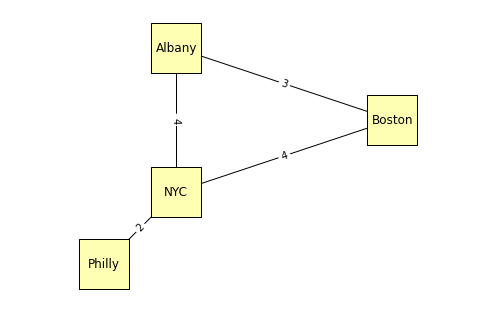

In [11]:
nx.draw(G, pos, 
        node_color=COLORS[1], 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(G, pos, 
                             edge_labels=drive_times)

plt.axis('equal')
plt.savefig('chap02-2.pdf')

**Exercise:**  Add another city and at least one edge.

(-80.0, -70.0, 39.5, 43.5)

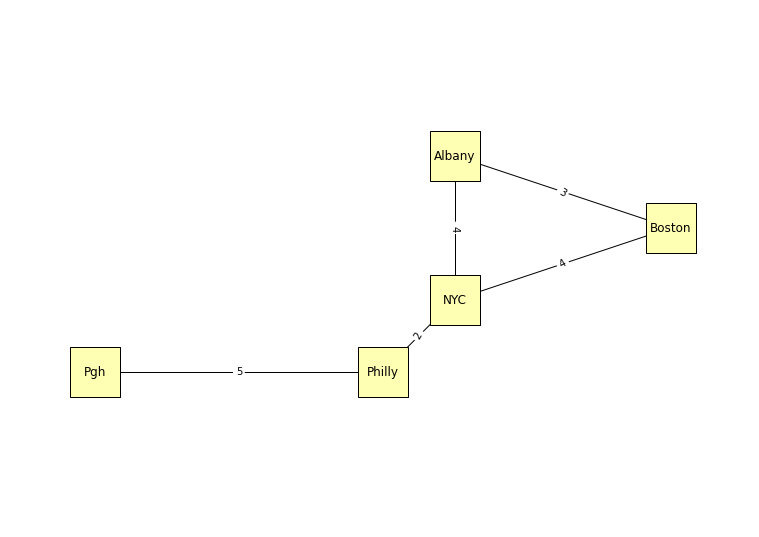

In [12]:
# Solution goes here
pos['Pgh'] = (-79, 40)
drive_times[('Pgh', 'Philly')] = 5

G.add_nodes_from(pos)
G.add_edges_from(drive_times)

plt.figure(figsize=(10, 7))
nx.draw(G, pos, 
        node_color=COLORS[1], 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(G, pos, 
                             edge_labels=drive_times)

plt.axis('equal')


## Complete graph

To make a complete graph, we use a generator function that iterates through all pairs of nodes.

In [13]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

`make_complete_graph` makes a `Graph` with the given number of nodes and edges between all pairs of nodes.

In [14]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

Here's a complete graph with 10 nodes:

In [15]:
complete = make_complete_graph(10)
len(complete.nodes())

10

And here's what it looks like.

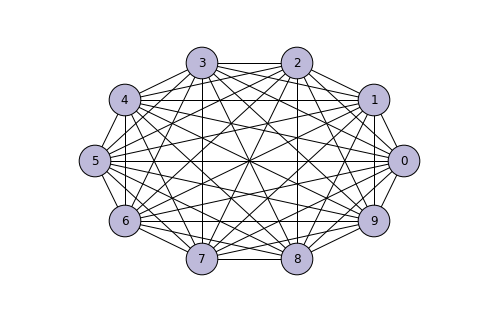

In [16]:
nx.draw_circular(complete, 
                 node_color=COLORS[2], 
                 node_size=1000, 
                 with_labels=True)
plt.savefig('chap02-3.pdf')

The `neighbors` method returns a list of neighbors for a given node.

In [17]:
complete.neighbors(0)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

**Exercise:** Make and draw complete directed graph with 5 nodes.

In [18]:
# Solution goes here
# By the definition of "connected" altered for "directed graphs":
# if there is a directed path from every node to every other node
# so, for directed graphs, every node should be able to reach the other nodes, in node->other node directionality 

def all_pairs_directed(nodes):
    """Note that itertools.permutations gives you the same as all_pairs_directed"""
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            # before, there was "if i < j"
            # this gave us all permutations of nodes
            # since we want all combinations
            # i.e. 1,3 is different than 3,1
            # we ignore
            yield u, v

def make_fully_connected_digraph(n):
    G = nx.DiGraph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs_directed(nodes))
    return G

def make_almost_complete_digraph(n):
    G = nx.DiGraph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

def make_complete_digraph(n):
    G = make_almost_complete_digraph(n)
    G.add_edge(4,0)
    return G

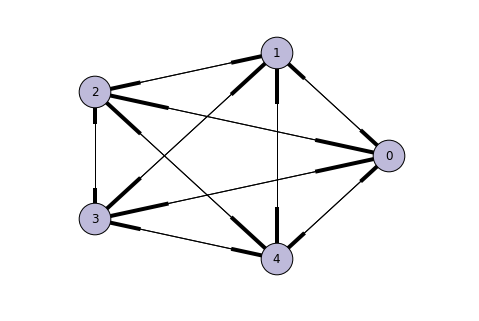

In [19]:
fully_complete_directed = make_fully_connected_digraph(5)
nx.draw_circular(fully_complete_directed, 
                 node_color=COLORS[2], 
                 node_size=1000, 
                 with_labels=True)

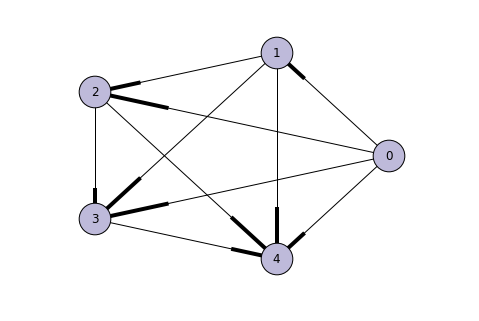

In [20]:
almost_complete_directed = make_almost_complete_digraph(5)
nx.draw_circular(almost_complete_directed, 
                 node_color=COLORS[2], 
                 node_size=1000, 
                 with_labels=True)

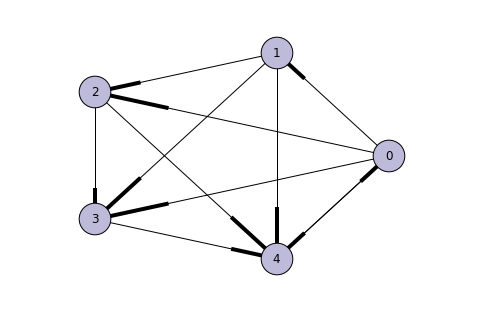

In [21]:
complete_directed = make_complete_digraph(5)
nx.draw_circular(complete_directed, 
                 node_color=COLORS[2], 
                 node_size=1000, 
                 with_labels=True)

## Random graphs

Next we'll make a random graph where the probability of an edge between each pair of nodes is $p$.

The helper function `flip` returns True with probability `p` and False with probability `1-p`

In [22]:
from numpy.random import random

def flip(p):
    return random() < p

`random_pairs` is a generator function that enumerates all possible pairs of nodes and yields each one with probability `p` 

In [23]:
def random_pairs(nodes, p):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i<j and flip(p):
                yield u, v

`make_random_graph` makes an ER graph where the probability of an edge between each pair of nodes is `p`.

In [24]:
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

Here's an example with `n=10` and `p=0.3`

In [25]:
random_graph = make_random_graph(10, 0.3)
len(random_graph.edges())

17

And here's what it looks like:

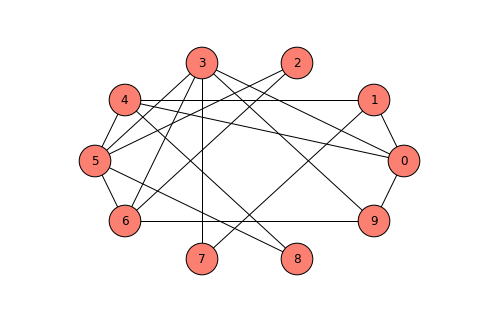

In [26]:
nx.draw_circular(random_graph, 
                 node_color=COLORS[3], 
                 node_size=1000, 
                 with_labels=True)
plt.savefig('chap02-4.pdf')

## Connectivity

To check whether a graph is connected, we'll start by finding all nodes that can be reached, starting with a given node:

In [27]:
def reachable_nodes(G, start, verbose=False):
    seen = set()
    stack = [start]
    while stack:
        if verbose:
            print("seen", seen)
            print("stack", stack)
            print("\n")
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

In the complete graph, starting from node 0, we can reach all nodes:

In [28]:
reachable_nodes(complete, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In the random graph we generated, we can also reach all nodes (but that's not always true):

In [29]:
reachable_nodes(random_graph, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

We can use `reachable_nodes` to check whether a graph is connected:

In [30]:
def is_connected(G):
    start = next(G.nodes_iter())
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

Again, the complete graph is connected:

In [31]:
is_connected(complete)

True

But if we generate a random graph with a low value of `p`, it's not:

In [32]:
random_graph = make_random_graph(10, 0.1)
len(random_graph.edges())

6

In [33]:
is_connected(random_graph)

False

**Exercise:** What do you think it means for a directed graph to be connected?  Write a function that checks whether a directed graph is connected.

In [34]:
# Solution goes here

def directed_is_connected(G):
    """O((m+n)*n)
    (m+n) because reachable_nodes takes this long, going through each node / edge
    (m+n)*n because reachable_nodes is called at a maximum of n times.
    """
    length_G = len(G)
    for node in G.nodes_iter():
        if len(reachable_nodes(G, node)) != length_G:
            return False
    return True

assert directed_is_connected(fully_complete_directed) == True
print("---------------------------")
assert directed_is_connected(almost_complete_directed) == False
print("---------------------------")
assert directed_is_connected(complete_directed) == True
print("---------------------------")

---------------------------
---------------------------
---------------------------


## Probability of connectivity

Now let's estimate the probability that a randomly-generated ER graph is connected.

This function takes `n` and `p`, generates `iters` graphs, and returns the fraction of them that are connected.

In [35]:
def prob_connected(n, p, iters=100):
    count = 0
    for i in range(iters):
        random_graph = make_random_graph(n, p)
        if is_connected(random_graph):
            count += 1
    return count/iters

With `n=10` and `p=0.3`, the probability of being connected is about 65%.

In [36]:
n = 10
prob_connected(n, 0.3, iters=10000)

0.6494

According to Erdos and Renyi, the critical value of `p` for `n=10` is about 0.23. 

In [37]:
pstar = np.log(n) / n
pstar

0.23025850929940458

So let's plot the probability of connectivity for a range of values for `p`

In [38]:
ps = np.logspace(-1.3, 0, 11)
ps

array([ 0.05011872,  0.0676083 ,  0.09120108,  0.12302688,  0.16595869,
        0.22387211,  0.30199517,  0.40738028,  0.54954087,  0.74131024,  1.        ])

I'll estimate the probabilities with `iters=1000`

In [39]:
ys = [prob_connected(n, p, 1000) for p in ps]

for p, y in zip(ps, ys):
    print(p, y)

0.0501187233627 0.0
0.0676082975392 0.0
0.0912010839356 0.004
0.123026877081 0.016
0.165958690744 0.11
0.223872113857 0.346
0.30199517204 0.664
0.407380277804 0.899
0.549540873858 0.989
0.741310241301 1.0
1.0 1.0


And then plot them, adding a vertical line at the computed critical value

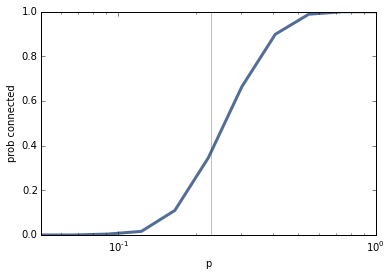

In [40]:
import thinkplot

thinkplot.vlines([pstar], 0, 1, color='gray')
thinkplot.plot(ps, ys)
thinkplot.config(xlabel='p', ylabel='prob connected', xscale='log', xlim=[ps[0], ps[-1]])
plt.savefig('chap02-5.pdf')

We can run the same analysis for a few more values of `n`.

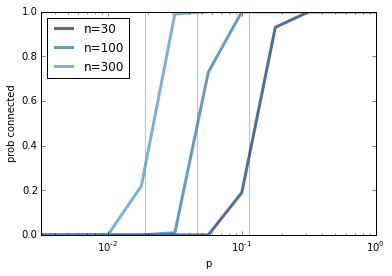

In [41]:
ns = [30, 100, 300]
ps = np.logspace(-2.5, 0, 11)

thinkplot.preplot(len(ns))
for n in ns:
    pstar = np.log(n) / n
    thinkplot.vlines([pstar], 0, 1, color='gray')

    ys = [prob_connected(n, p) for p in ps]
    thinkplot.plot(ps, ys, label='n=%d' % n)

thinkplot.config(xlabel='p', ylabel='prob connected',
                 xscale='log', xlim=[ps[0], ps[-1]],
                 loc='upper left')
plt.savefig('chap02-6.pdf')

As `n` increases, the critical value gets smaller and the transition gets more abrupt.

## Exercises

**Exercise:** In Chapter 2 we analyzed the performance of `reachable_nodes` and classified it in $O(n + m)$, where $n$ is the number of nodes and $m$ is the number of edges.  Continuing the
analysis, what is the order of growth for `is_connected`?

    def is_connected(G):
        start = next(G.nodes_iter())
        reachable = reachable_nodes(G, start)
        return len(reachable) == len(G)

__Solution__:
Accessing the start iterator from the graph G is O(1)

reachable_nodes() is O(n+m)

len() is a constant time operation.

Thus order of growth for is_connnected is classified in O(n+m)


**Exercise:** In my implementation of `reachable_nodes`, you might be bothered by the apparent inefficiency of adding *all* neighbors to the stack without checking whether they are already in `seen`.  Write a version of this function that checks the neighbors before adding them to the stack.  Does this "optimization" change the order of growth?  Does it make the function faster?

In [42]:
def reachable_nodes_precheck(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        seen.add(node)
        stack.extend([n for n in G.neighbors(node) if n not in seen])
    return seen

__Solution__:
Each time through the loop, we pop off a node from the stack, which is a O(1).

Since the precheck function ensures that there are no duplicate nodes in
the stack, we can immediately add the node to seen w/out checking.

Then, we use a list comprehension to determine the list of neighbors of the
node, for which we have not seen already. This is a loop that iterates over
all neighbors, which could be at most (n-1) nodes if they are all connected.
Then we check if that neighbor was seen, which is constant time. If it was
not seen, the element should make up the output of the list comprehension.

Each node is only added to seen once, so the total number of additions is n.

Nodes are also only added to the stack once as well. So total number of
additions to stack is total number of nodes, n.

So, order of growth for this function is classified in O((n+n)*(n-1)), or O(n^2).


In [43]:
%timeit len(reachable_nodes(complete, 0))

10000 loops, best of 3: 36.8 µs per loop


In [44]:
%timeit len(reachable_nodes_precheck(complete, 0))

10000 loops, best of 3: 103 µs per loop


In [45]:
print("n: ", len(complete.nodes()))
print("m: ", len(complete.edges()))

n:  10
m:  45


For our example, with 10 nodes and 45 edges, the precheck makes calculating reachable nodes slower.

**Exercise:** There are actually two kinds of ER graphs.  The one we generated in the chapter, $G(n, p)$, is characterized by two parameters, the number of nodes and the probability of an edge between nodes.

An alternative definition, denoted $G(n, m)$, is also characterized by two parameters: the number of nodes, $n$, and the number of edges, $m$.  Under this definition, the number of edges is fixed, but their location is random.

Repeat the experiments we did in this chapter using this alternative definition.  Here are a few suggestions for how to proceed:

1. Write a function called `m_pairs` that takes a list of nodes and the number of edges, $m$, and returns a random selection of $m$ edges.  A simple way to do that is to generate a list of all possible edges and use `random.sample`.

2. Write a function called `make_m_graph` that takes $n$ and $m$ and returns a random graph with $n$ nodes and $m$ edges.

3. Make a version of `prob_connected` that uses `make_m_graph` instead of `make_random_graph`.

4. Compute the probability of connectivity for a range of values of $m$.

How do the results of this experiment compare to the results using the first type of ER graph?

In [46]:
# Solution goes here

def m_pairs(nodes, m):
    edges = list(all_pairs(nodes))
    np.random.shuffle(edges)
    return edges[:m]

m_pairs(complete.nodes(), 3)

[(0, 6), (0, 9), (1, 3)]

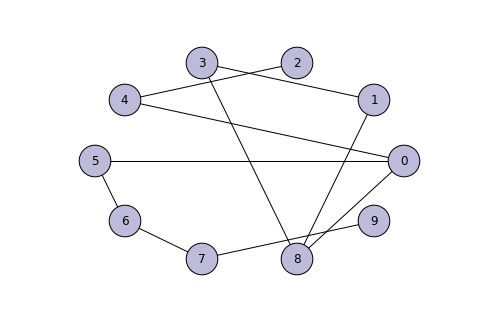

In [47]:
# Solution goes here

def make_m_graph(n, m):
    nodes = range(n)
    edges = m_pairs(nodes, m)
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    return G

m_graph = make_m_graph(10, 10)
nx.draw_circular(m_graph, 
                 node_color=COLORS[2], 
                 node_size=1000, 
                 with_labels=True)

In [48]:
# Solution goes here
def prob_connected_m_graph(n, m, iters=100):
    count = 0
    for i in range(iters):
        random_graph = make_m_graph(n, m)
        if is_connected(random_graph):
            count += 1
    return count/iters

Testing graphs with 10 nodes, over a range of edges

In [49]:
ms = range(3, 31, 3)
ys = [prob_connected_m_graph(10, m, iters=10000) for m in ms]

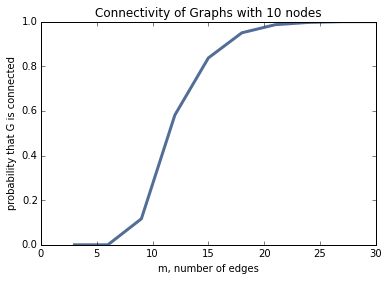

In [50]:
thinkplot.plot(ms, ys)
thinkplot.config(xlabel='m, number of edges',
                 ylabel='probability that G is connected',
                 title='Connectivity of Graphs with 10 nodes')

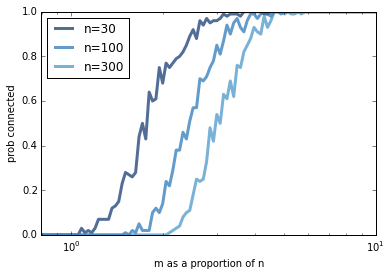

In [52]:
ns = [30, 100, 300]
ms_as_prop_of_n = np.logspace(-0.1, 1, 100)

thinkplot.preplot(len(ns))
for n in ns:
    ms = [int(prop * n) for prop in ms_as_prop_of_n]
    ys = [prob_connected_m_graph(n, m) for m in ms]
    thinkplot.plot(ms_as_prop_of_n, ys, label='n=%d' % n)

thinkplot.config(xlabel='m as a proportion of n', ylabel='prob connected',
                 xscale='log', xlim=[ms_as_prop_of_n[0], ms_as_prop_of_n[-1]],
                 loc='upper left')

__Excercise__:

Write a brief response to Chapter 1 based on your reading and Tuesday's panel discussion. This is a truly open-ended task, but here are some questions you might consider:

__Solution__:

Off the bat, I am most excited about three topics: 1) How to choose the governing rules in the models to represent the complex system; 2) the goal of these models to be a useful explanatory tool and 3) having better taste on how to implement these simulation algorithms. To explore these learning goals, I can try the following: 1) choose to understand the examples of modeling of systems, and always ask how those system dynamics were decided as the best model; 2) pick projects or assignments that do more explaining and helping us intuit about things in the world; 3) try multiple implementations of the algorithms we are assigned.

Truthfully, I have not had a lot of background in the domains like economics / sociology, which are the subject of complex system analysis. The academic papers I have read have been more tightly focused in the neural network and machine learning space. In relation to an academic field being more open to less rigorous types of math proofs to make headway in a domain, the deep learning community in particular has been more open to publishing work which shows improvements in speed of training or accuracy in prediction, even if the mathematical work is hinted at a level of less rigor. I expect to be suprised to learn how other fields might not accept the complexity models we build.  I also expect to learn how models which "explain" behavior but do not "move the dial forward" at the end of the day at some predictive task get evaluated as being correct, signficant, and useful.

- What aspects of complexity science are most interesting to you, and why? How might you explore them in the course?
    - __Model Building__: How does one choose the simple agent rules that model a system. Like in the segregation model example?  Or does the choice of rules / model also give a lense on the question you are asking? i.e. Segregation explained by humans' personal decisions about staying in the neighborhood based on their happiness determined by affinity.
    - __Goal of Models__: Predictive -> Explanatory.  This shift was a suprising one, since I had an assumption that prediction is the pinnacle of understanding something.  But as I think about it, models like Neural Networks to achieve certain tasks have succeeded, yet haven't really made the picture more clear on HOW things occur.  Explanatory Data Analysis, in my rather narrow experience, has meant less computation, more visualization, more human intuitable.  I like that explanatory can be bolstered by computation.  It's a new way of thinking for me.  I think one way is to choose projects that have a strong explantory component. Or try to link my answers to questions with an explantory component.
    - Decentralized, peer to peer, are all things not well explored for me, but are interesting.
    - __Classes of Algorithms__: Use of genetic algorithms for search, rather than design. 
    - How thinking like a Complexity Scientists makes us more subjective. I think taking the subject into account is good!

- With respect to what complexity science is and how it works, where does it seem like people are generally in agreement, and where are there debates? What is at stake in these debates? (In other words, why do they matter -- if at all?)
    - From the reading, people are on the fence about using computation as a part of proofs. If we enumerate all possible cases and prove those cases computationally, then those can serve as Lemmas as part of the proof...
    - If complexity science is a new science -> why does that matter -> its hard to publish computational work as added knowledge in a domain like Economics -> at the meat of the matter, models to understand things fall on the spectrum of classical physical models that can be deduced from first principles and models that are more simulation based, whose results are emergent, whose results can't be fully intuited without simulation. -> maybe not a "new science" but a part of the spectrum of models that deserves increasing recognition on being useful to do work, to simulate, to predict, to explain 

- What is your personal take on the subject? How has it been informed by your prior experiences and/or exposure to these ideas? How do you expect your perspective to evolve over the course of the semester?
    - In deep learning papers, what gets published is evolving performance on a bench mark dataset, increasing speed, and intuiting about how a change in architecture or approach leads to these changes.  I don't _think_ that a paper in deep learning can be published without making some intuition out of first principles of the architecture or system.  Yes, maybe the degree or rigor is less.  Intuiting is not proving.  But these papers are not discouraged.
    - Moreoever, the degree of proof is lacking compared to the growth in novel architectures that just work, which "kind of" match when you squint and are expecting it to look a certain way. So this community has grown to accept progress of any sort, be it quantifiable evidence on improving state of the art, even if understanding is not neccesarily increased?
    - But the game changing papers still practice science, which I define as building off previous experience until something doesn't match previous experience, and then going of in that tangent to resolve the dichotomy. This explanation is the tip of the iceberg of the science the Thomas Kuhn talks about. 